In [1]:
#Read in standard packages
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import geopandas as gpd

In [2]:
#read in ML packages/modules
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.metrics import classification_report

In [3]:
#Read in dask package and set up to allow for faster compute times. Distributes computing among all availabel preocessors
from dask import dataframe as dd
import joblib
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
client = Client(cluster)
cluster.scheduler, cluster.workers

C:\Users\bwils\anaconda3\envs\pumpitup\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 64617 instead
  warnings.warn(


(<Scheduler: "tcp://127.0.0.1:64620" processes: 3 cores: 6>,
 {0: <Nanny: tcp://127.0.0.1:64639, threads: 2>,
  1: <Nanny: tcp://127.0.0.1:64645, threads: 2>,
  2: <Nanny: tcp://127.0.0.1:64642, threads: 2>})

### Compare Model Accuracies

Let's take a look at all our models to see which one was able to achieve the best accuracy both before and after tuning.

In [4]:
#Read in all score dataframes from other notebooks
scores_list = os.listdir('Data/scores')
score_df=pd.DataFrame()
for score in scores_list:
    df = pd.read_pickle(r'Data/scores/{score}'.format(score=score))
    score_df = pd.concat([score_df, df], join='outer')
score_df.index.rename('Model', inplace=True)
score_df

,Accuracy,algorithm,base_estimator,learning_rate,n_estimators,random_state,base_estimator__bootstrap,base_estimator__ccp_alpha,base_estimator__class_weight,base_estimator__criterion,...,monotone_constraints,num_parallel_tree,reg_alpha,reg_lambda,scale_pos_weight,subsample,tree_method,validate_parameters,verbosity,eval_metric
Model,,,,,,,,,,,,,,,,,,,,,
ADA_OBO,0.725993,SAMME.R,None,1.0,50.0,None,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADA_RF50,0.800471,SAMME.R,RandomForestClassifier(class_weight='balanced_...,1.0,50.0,None,True,0.0,balanced_subsample,gini,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADA_LR,0.745387,SAMME.R,"LogisticRegression(C=10, solver='liblinear', v...",1.0,50.0,None,NaN,NaN,None,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN_OBO,0.775825,auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KNN_Dist,0.776566,auto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XGB_0.067112288398659_3,0.790572,NaN,NaN,0.3,100.0,0,NaN,NaN,NaN,NaN,...,(),1,0.0,1.0,0.067112,1,exact,1.0,1.0,mlogloss
XGB_1_7,0.791717,NaN,NaN,0.3,100.0,0,NaN,NaN,NaN,NaN,...,(),1,0.0,1.0,1,1,exact,1.0,1.0,mlogloss
XGB_0.067112288398659_7,0.791717,NaN,NaN,0.3,100.0,0,NaN,NaN,NaN,NaN,...,(),1,0.0,1.0,0.067112,1,exact,1.0,1.0,mlogloss


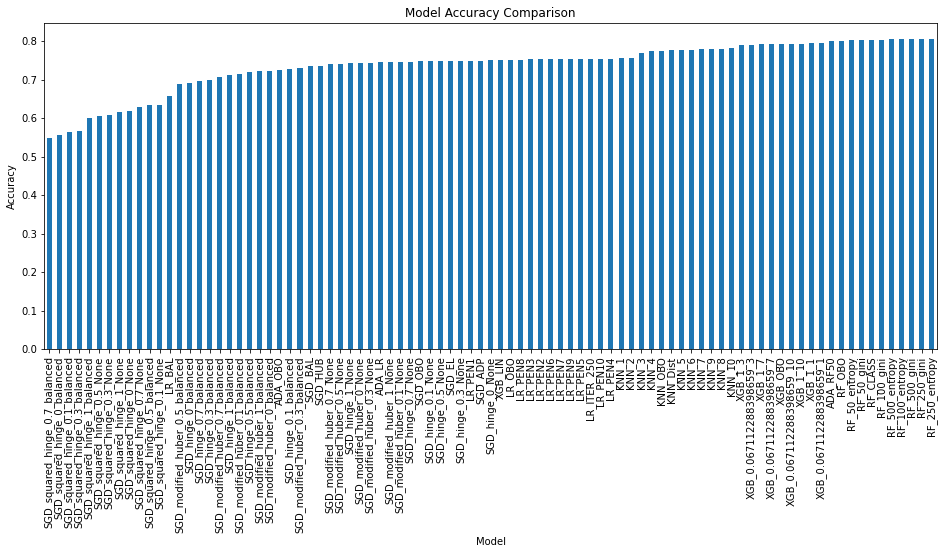

In [5]:
#Plot the accuracies from worst to best going left to right
plt.figure(figsize=(16, 6))
score_df['Accuracy'].sort_values().plot(kind='bar')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

The above showes that Random Forest and XGBoost far exceed the performance of Logistic Regression. Random Forest also has an edge over XGBoost, but we should zoom in a little closer to get a better visual of the difference.

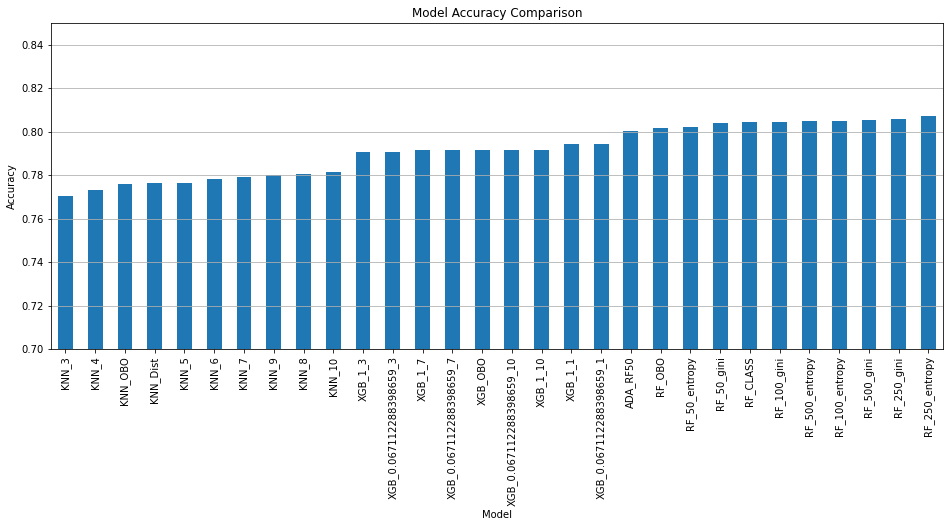

In [6]:
#Zoom to only releveant accuracy measures
plt.figure(figsize=(16, 6))
score_df['Accuracy'].sort_values().tail(30).plot(kind='bar')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0.70, 0.85)
plt.grid(axis='y')
plt.show()

Random Forest is the best performer based on the hyperparameter tuning that we performed. There are many more combinations that could be explored, especially for XGBoost, that could enchance the performance though a computer with more computational power would be recommended. Overall it does appear that tree based models will consistently outperform linear ones.

In [7]:
score_df.sort_values(by='Accuracy', ascending=False, inplace=True)
score_df.to_csv(r'Reports/Model_Metrics')